In [5]:
import scipy as sc
import pylab as pl
from scipy.integrate import odeint
import matplotlib.pylab as gr
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
#Definición de los estado estable. 

def x_inf(V,Vx,sx):
    return 1/(1 + np.exp((Vx-V)/sx))

def e_inf(V):
    return 1/(1+np.exp((V-Ve)/se))


In [7]:
#Parámetros del sistema

C=10 
gCa=2
VCa=50
Vm=-20
sm=12
gDR=4.4
VK=-75
Vn=-5
sn=10
tau_n=43
gA= 13 #puede ir de 0 a 20
Va=-20
sa=10 
Ve=-60
se=5 
gL= 0.3 
tau_e=20

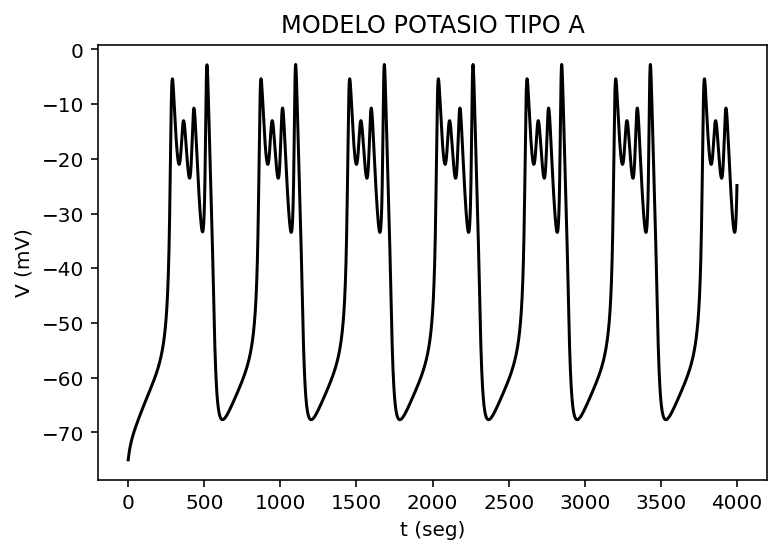

In [8]:
t = np.arange(0.0, 4000.0, 0.1)

#Definición del sistema
def sistema(U,t):
    V,n,e = U
    dV=(-gCa*(x_inf(V,Vm,sm))*(V-VCa)-gDR*n*(V-VK)-gA*(x_inf(V,Va,sa))*e*(V-VK)-gL*(V-VK))/C
    dn=(x_inf(V,Vn,sn)-n)/tau_n
    de=(e_inf(V)-e)/tau_e
    return dV,dn,de

U = odeint(sistema,[-75,0.1,0.1],t)
V = U[:,0]
n = U[:,1]
e = U[:,2]

pl.figure()
pl.title('MODELO POTASIO TIPO A')
pl.plot(t, V, 'k')
pl.ylabel('V (mV)')
pl.xlabel('t (seg)')
pl.show()